<div style='list-style-type: upper-roman;background-color:#f9f0ff'>
<hr style="height:2px;border-width:0;background-color:violet">
<hr style="height:2px;border-width:0;background-color:violet">
<center> 
    <h1 style='color:royalblue'><b>Tarea 9: Tree Decision models</b></h1> 
    <h3> Introducción a Ciencia de Datos</h3>
    <h5><a href="https://github.com/PhysTony/ICD_CIDE" target="_blank" style="text-align:justify; color:blue">Antonio Huerta Montellano</a></h5>
</center>
<hr style="height:2px;border-width:0;background-color:violet">
<hr style="height:2px;border-width:0;background-color:violet">
</div>
<br>

<ol type="I"> 
    <li> A partir de la base de datos Iris que está disponible en sklearn construye cuatro árboles de decisión con niveles de profundidad máximos de 1, 2, 3 y ninguno. Utiliza $33\%$ de los datos para el conjunto de prueba.
</ol>

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,9

print("Modulos importados.")

Modulos importados.


Ahora, importaremos los datos; indicaremos las variables dependientes (etiquetas objetivo) e independientes (Características para predecir); después, crearemos los conjuntos de entrenamiento y de prueba.

In [2]:
# Importamos los datos
data = load_iris()
# Características para predecir
X = data.data
# Etiquetas objetivo
y = data.target
# Dividimos los conjuntos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    random_state = 0, 
                                                    test_size = 1/3)

Como ya conocemos la cantidad de *accuracy scores* que debemos hallar, podemos crear dos *array* de tamañao fijo que alamacene dichos valores. En este caso, serán de tamaño $4\times 1$ debido a que son 10 *scores* los que necesitamos y dos comparaciones. Así mismo, se guardará en otra lista los modelos.

In [3]:
accuracy_scores_train = np.ones((4))
accuracy_scores_test = np.ones((4))
tree_model = [None]*4

In [4]:
# La última entrada será igual al modelo sin especificar la profundidad
tree = DecisionTreeClassifier(random_state=0)   # Especificamos la profundidad
tree.fit(X_train, y_train)
accuracy_scores_train[3] = tree.score(X_train, y_train)
accuracy_scores_test[3] = tree.score(X_test, y_test)
tree_model[3] = tree

Crearemos un loop para guardar las  distintas precisiones para cada profundidad.

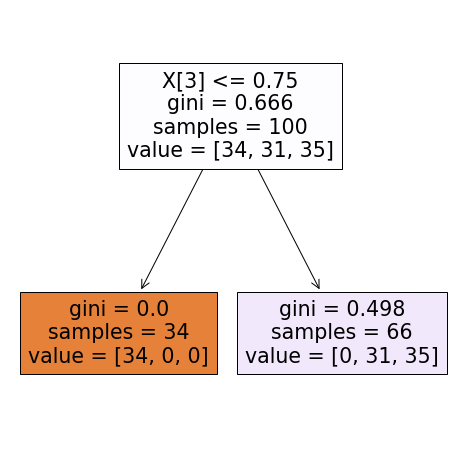

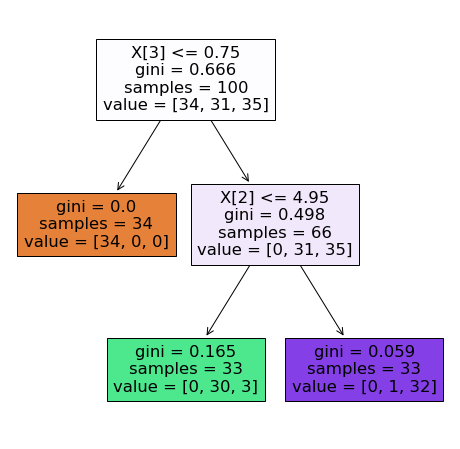

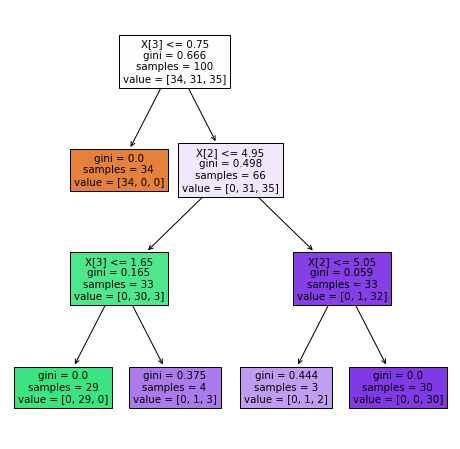

In [8]:
for i in range(3):
    tree = DecisionTreeClassifier(max_depth = i+1,
                                  random_state=0)
    
    tree.fit(X_train, y_train)
    
    accuracy_scores_train[i] = tree.score(X_train, y_train)
    accuracy_scores_test[i] = tree.score(X_test, y_test)
    tree_model[i] = tree
    
    plt.figure(figsize=(8, 8))
    plot_tree(tree_model[i], filled=True)
    plt.show()

<ol type="I"> 
    <li> Imprime pruebas de exactitud con los conjuntos de entrenamiento y de prueba. ¿Qué modelo se te hace el más adecuado?, ¿Crees que haya overfitting? ¿Crees que el modelo con profundidad = 1 es bueno? ¿Por qué los resultados con tres niveles y sin especificar profundidad máxima son iguales? ¿Qué significa que el valor de Gini de cada etapa se reduzca?
</ol>

In [ ]:
# Imprimamos las precisiones con un loop
for i in range(4):
    print("Entrenamiento:")
    print("Profundidad = " + str(i + 1) + " - " + str(accuracy_scores_train[i]))
    
    print("Prueba:")
    print("Profundidad = " + str(i + 1) + " - " + str(accuracy_scores_test[i]) + "\n")
    
    if i == 3:
        print("Entrenamiento:")
        print("Sin especificiar profundidad: " + str(accuracy_scores_train[i]))

        print("Prueba:")
        print("Sin especificiar profundidad: " + str(accuracy_scores_test[i]))

Teóricamente, para ver que no haya overfitting se tiene que ver un buen desempeño tanto en el conjunto de entrenamiento como en el de prueba. Basados en esto, el modelo con mejor desempeño es el primero cuya profundidad es igual a uno; esto, puesto que tiene la precisión más alta posible para ambos conjuntos, por lo que lo hace bastante bien, Sin embargo, puede que este capturando bastantes impurezas, pero eso se observaría con el parámetro gini en cada de uno de lo modelos calculados para ver si aumentar la profundidad ayuda al modelo. Por otro lado, vemos que hay pequeños indicios de overfitting para los modelos con profundidad igual a 2 y 3 porque su desempeño es mejor en el  conjunto  de entrenamiento que  en el de prueba. Sin embargo, vemos que el modelo con profundidad igual a tres y sin eespecificar tienen el mismo desempeño, esto se puede deber a solo dos opciones: Como el default de muestra mínima es 2, entonces el número de elementos en una de las hojas tiene dos elementos; la otra posibilidad es que ya todas las hojas son puras en ambos casos de profunidad. Que el coeficiente gini se reduzca en cada etapa significa que las impurezas en cada nodo en cada etapa son cada vez menores.

<ol type="I"> 
    <li> Calcula la importancia relativa de los atributos. 
</ol>
<br>
<p>Veamos si se guardaron correctamente los modelos en la lista:</p>

In [ ]:
tree_model

In [ ]:
def plot_feature_importances(model, i):
    plt.figure(figsize=(10,3))
    n_features = data.data.shape[1] 
    if i == 4:
        profundidad = "No especificada"
    else:
        profundidad = i
    
    plt.barh(range(n_features), model.feature_importances_, 
             align='center', color = 'royalblue',
             edgecolor = 'pink', linewidth = 2 )
    plt.yticks(np.arange(n_features), 
               data.feature_names,
               fontsize = 10,
               color = 'darkviolet',
               fontweight = 'bold')
    plt.xticks(fontsize = 10,
               color = 'darkviolet',
               fontweight = 'bold')
    plt.xlabel("Importancia relativa de  los atributos para profundidad = " + str(profundidad), 
               fontsize = 13, fontweight = 'bold',
               color = 'maroon')
    plt.ylabel("Característica", fontsize = 12, 
               fontweight = 'bold', color = 'maroon')
    plt.grid(color = 'limegreen', 
             linestyle='-',
             alpha = 0.7)

In [ ]:
for i in range(4):
    plot_feature_importances(tree_model[i],i+1)

<ol type="I"> 
    <li> Para la misma base de datos construye árboles de decisión con profundidad = 3, pero ahora en vez de utilizar los cuatro atributos usa por separado todas las combinaciones posibles de parejas.
</ol>

In [ ]:
# Veamos cómo está guardada la data
data.data.shape

Análogamente a un inciso anterior, guardaremos la precisión de los distintos modelos en una lista.

In [ ]:
accuracy_scores_train_3 = np.ones((4))
accuracy_scores_test_3 = np.ones((4))
names = [i for i in data.feature_names]

In [ ]:
for i in range(4):
    X = data.data[:,i].reshape(-1, 1)
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                        random_state = 0, 
                                                        test_size = 1/3)
    tree = DecisionTreeClassifier(max_depth = 3,
                                  random_state = 0)
    
    tree.fit(X_train, y_train)
    
    accuracy_scores_train_3[i] = tree.score(X_train, y_train)
    accuracy_scores_test_3[i] = tree.score(X_test, y_test)

<ol type="I"> 
    <li> Imprime pruebas de exactitud con los conjuntos de entrenamiento y de prueba.
</ol>

In [ ]:
for i in range(4):
    print("Atributo: " + str(names[i]))
    print("Entrenamiento:")
    print("Precisión = " + str(accuracy_scores_train_3[i]))
    
    print("Prueba:")
    print("Precisión = " + str(accuracy_scores_test_3[i]) + "\n")

<ol type="I"> 
    <li> Crees que tus resultados son consistentes con el resultado de importancia relativa de los atributos obtenido en el caso en que se usan los cuatro atributos para el análisis.
</ol>

Vemos que en general son consistentes puesto que cuanto mayor sea la importancia del atributo, mayor es su precisión. Sin embargo, viendo los gráficos, se aprecia que esta regla es cierta para los atributos de mayor improtancia que son los primeros dos atributos mostrados en el gráfico de barras para una profundidad igual a tres, pero para  los atributos de menor importancia no se cumple tal cual esta regla puesto que hay un atributo que no tiene importancia en el modelo, *sepal length (cm)*, que obtiene un mayor desempeño que el atributo *sepal width (cm)* que sí tiene un pequeño nivel de importancia y no nulo. Sin embargo, no se descarta que esto se pueda deber a un problema de falta de validación cruzada, es decir, que se haya escogido por accidente un dataframe conveniente para dicho atributo